# Energy Efficiency

## Deskripsi Masalah

Dilakukan analisis efisiensi energi menggunakan bentuk bangunan berbeda yang disimulasikan dalam Ecotect. Variabel yang ada dalam bangunan tersebut yang selanjutnya disebut variabel bebas diantaranya (Relative Compactness) yang merupakan salah satu faktor evaluasi, luas permukaan (Surface Area), luas dinding (Wall Area), tinggi keseluruhan (Overall Height), orientasi (Orientation), luas kaca(Glass Area), distibusi luas kaca (Glazing Area Distribution). Sedangkan variabel yang akan diprediksi adalah heating load dan cooling load. Heating load adalah jumlah energi panas yang perlu ditambahkan ke ruang untuk mempertahankan suhhu dalam kisaran yang dapat diterima. Sedangkan cooling load adalah jumlah energi yang perlu dikeluarkan dari ruang untuk mempertahankan suhu dalam kisaran yang dapat diterima. 

Data energy efficiency diambil dari UCI Machine Learning Repository. Untuk linknya adalah sebagai berikut:https://archive.ics.uci.edu/ml/datasets/energy+efficiency

## Loading Libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import *
from random import random, seed
from matplotlib import cm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import classification_report

## Loading Dataset

### Get Data

In [2]:
# import dataset from excel
df = pd.read_excel('C:/ENB2012_data.xlsx')
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


### Explore Data

In [3]:
# check data types in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Relative Compactness         768 non-null float64
Surface Area                 768 non-null float64
Wall Area                    768 non-null float64
Roof Area                    768 non-null float64
Overall Height               768 non-null float64
Orientation                  768 non-null int64
Glazing Area                 768 non-null float64
Glazing Area Distribution    768 non-null int64
Heating Load                 768 non-null float64
Cooling Load                 768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


Dalam dataset energy efficiency terdapat 8 variabel bebas yaitu relative compactness, surface area, wall area, roof area, overall height, orientation, glazing area, dan glazing area distribution. Kemudian 2 variabel terikatnya adalah heating load dan cooling load. Data ini memiliki 2 tipe data yaitu float64 dan int64.

In [4]:
# get descriptive statistics summary of data set
df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [5]:
# check correlation between variables
df.corr()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
Relative Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,0.000000,1.283986e-17,1.764620e-17,0.622272,0.634339
Surface Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,0.000000,1.318356e-16,-3.558613e-16,-0.658120,-0.672999
Wall Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,0.000000,-7.969726e-19,0.000000e+00,0.455671,0.427117
Roof Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,0.000000,-1.381805e-16,-1.079129e-16,-0.861828,-0.862547
Overall Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,0.000000,1.861418e-18,0.000000e+00,0.889430,0.895785
Orientation,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,-0.002587,0.014290
Glazing Area,1.283986e-17,1.318356e-16,-7.969726e-19,-1.381805e-16,1.861418e-18,0.000000,1.000000e+00,2.129642e-01,0.269842,0.207505
Glazing Area Distribution,1.764620e-17,-3.558613e-16,0.000000e+00,-1.079129e-16,0.000000e+00,0.000000,2.129642e-01,1.000000e+00,0.087368,0.050525
Heating Load,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-0.002587,2.698417e-01,8.736846e-02,1.000000,0.975862
Cooling Load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,0.014290,2.075050e-01,5.052512e-02,0.975862,1.000000


In [6]:
plt.style.use('ggplot')

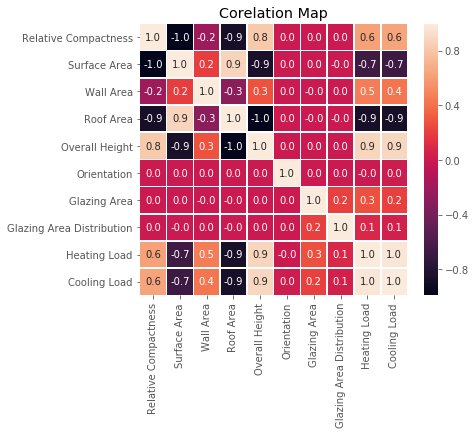

In [7]:
# preview correlation
f, ax = plt.subplots(figsize=(6,5))
sns.heatmap(df.corr(), annot = True, linewidths=0.5, fmt = '.1f', ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Corelation Map')
plt.show()

Dari hasil diatas dapat dilihat bahwa variabel yang memiliki hubungan yang kuat adalah overall height dengan heating load dan cooling load.

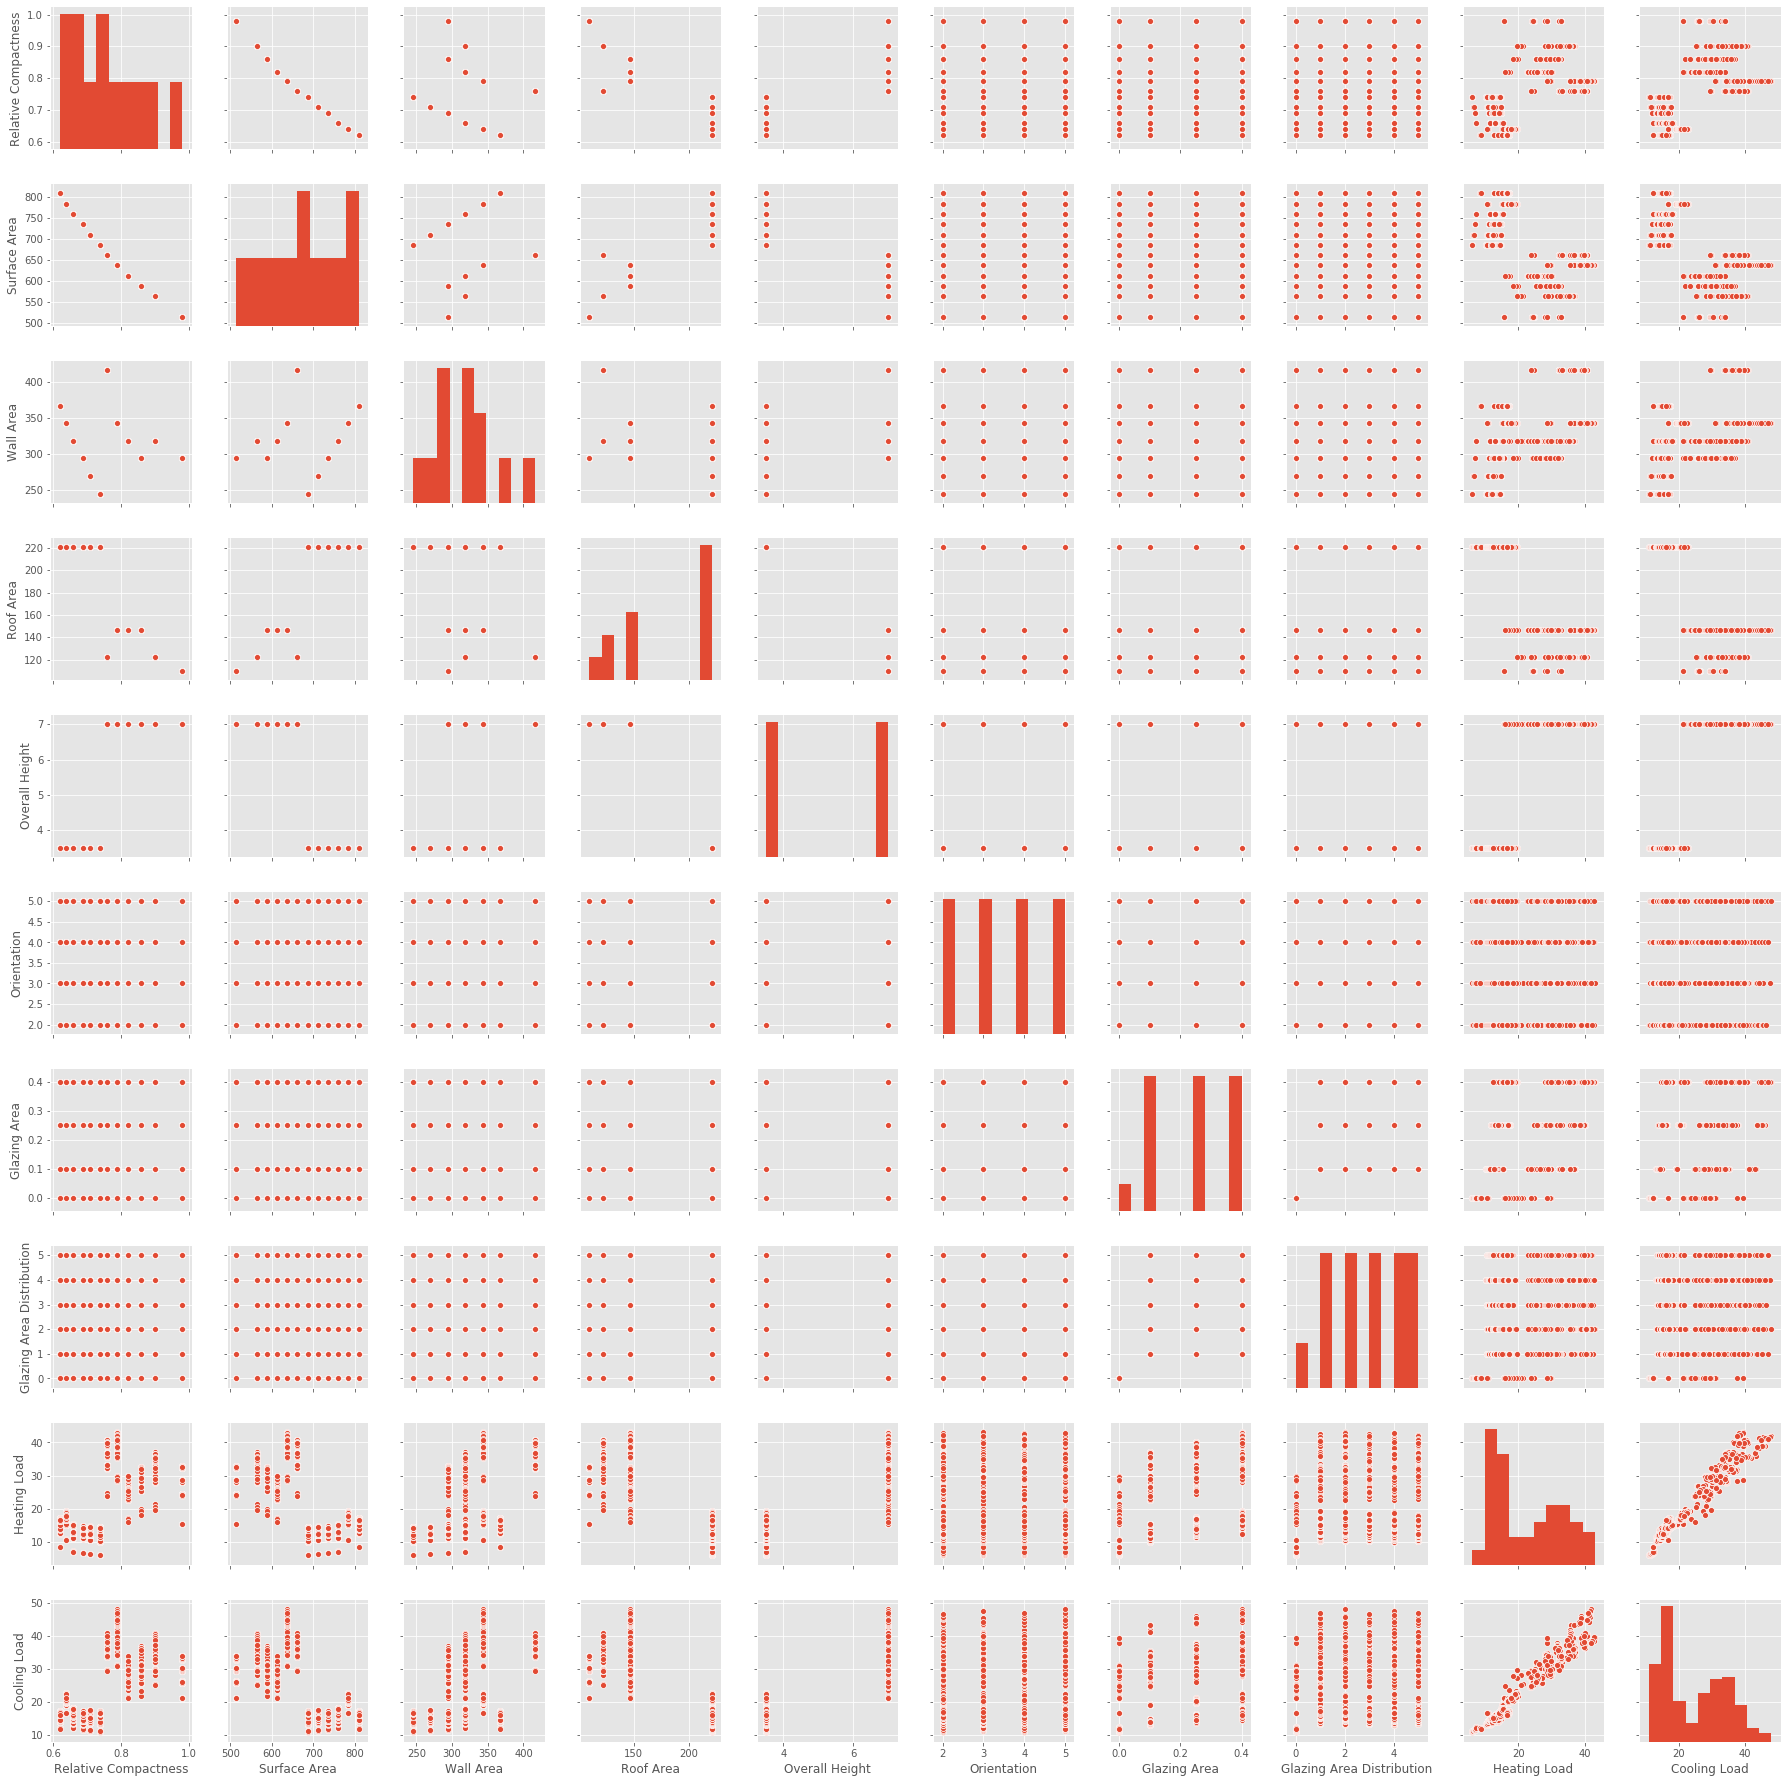

In [8]:
sns.pairplot(df, kind='scatter')

## Data Preprocessing

In [9]:
# check missing value
df.isnull().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

Dari proses data diatas dapat diketahui bahwa tidak ada variabel yang memiliki missing value.

In [10]:
# separating variable into dependent and independent variable
feature_names = ['Relative Compactness','Surface Area','Wall Area','Roof Area','Overall Height','Orientation','Glazing Area','Glazing Area Distribution']
X1 = df[feature_names]

In [11]:
y1 = df['Heating Load']

Presentase pembagian data antara training set dan test set adalah 80% : 20%. Selanjutnya juga diambil random state=100, random state digunakan untuk memeriksa dan memvalidasi data saat menjalankan kode beberapa kali.

In [12]:
# split data into train and test set : 80% 20%
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state=100)

In [13]:
scaler = MinMaxScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

In [14]:
# separating variable into dependent and independent variable
y2 = df['Cooling Load']

In [15]:
# split data into train and test set : 80% 20%
X1_train, X1_test, y2_train, y2_test = train_test_split(X1, y2, test_size = 0.2, random_state=100)

## Linear Regression

### Prediksi Heating Load dengan Regresi Linear Berganda

In [16]:
linreg1 = LinearRegression()
linreg1.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# model evaluation

# the coefficient
print('Slope: ', linreg1.coef_)
# the intercept
print('Intercept: ', linreg1.intercept_)

Slope:  [-6.33918851e+01 -5.86370716e-02  3.46025096e-02 -4.66197906e-02
  4.36196541e+00  1.81201264e-02  1.98760902e+01  2.19173051e-01]
Intercept:  79.12970619500878


In [18]:
# Predicting the test set result
y1_pred = linreg1.predict(X1_test)

In [19]:
# Import module
from sklearn import metrics
# Calculate and print values of R^2, MAE, MSE, RMSE
print("R^2: {}".format(linreg1.score(X1_test, y1_test)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y1_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))

R^2: 0.9094940323320939
Mean Absolute Error: 2.0792429771690313
Mean Squared Error: 8.441431556980914
Root Mean Squared Error: 2.905414179937331


### Prediksi Cooling Load dengan Regresi Linear Berganda

In [20]:
linreg2 = LinearRegression()
linreg2.fit(X1_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# model evaluation

# the coefficient
print('Slope: ', linreg2.coef_)
# the intercept
print('Intercept: ', linreg2.intercept_)

Slope:  [-6.89740974e+01 -6.05812715e-02  1.99445978e-02 -4.02629347e-02
  4.56791895e+00  1.86178201e-01  1.50858656e+01  4.13901971e-02]
Intercept:  90.49139889878981


In [22]:
# Predicting the test set result
y2_pred = linreg2.predict(X1_test)

In [23]:
# Import module
from sklearn import metrics
# Calculate and print values of R^2, MAE, MSE, RMSE
print("R^2: {}".format(linreg2.score(X1_test, y2_test)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y2_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y2_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))

R^2: 0.8631479334567576
Mean Absolute Error: 2.4585017344871387
Mean Squared Error: 11.51147251522277
Root Mean Squared Error: 3.392856099987556


## Classification

### Heating Load

In [24]:
knr1 = KNeighborsRegressor()
knr1.fit(X1_train, y1_train)
print('Accuracy of K-NN regressor on training set: {:.2f}'
     .format(knr1.score(X1_train, y1_train)))
print('Accuracy of K-NN regressor on test set: {:.2f}'
     .format(knr1.score(X1_test, y1_test)))

Accuracy of K-NN regressor on training set: 0.97
Accuracy of K-NN regressor on test set: 0.95


In [25]:
dtr1 = DecisionTreeRegressor()
dtr1.fit(X1_train, y1_train)
print('Accuracy of Decision Tree regressor on training set: {:.2f}'
     .format(dtr1.score(X1_train, y1_train)))
print('Accuracy of Decision Tree regressor on test set: {:.2f}'
     .format(dtr1.score(X1_test, y1_test)))

Accuracy of Decision Tree regressor on training set: 1.00
Accuracy of Decision Tree regressor on test set: 1.00


In [26]:
svr1 = SVR()
svr1.fit(X1_train, y1_train)
print('Accuracy of SVR on training set: {:.2f}'
     .format(svr1.score(X1_train, y1_train)))
print('Accuracy of SVR on test set: {:.2f}'
     .format(svr1.score(X1_test, y1_test)))

Accuracy of SVR on training set: 0.90
Accuracy of SVR on test set: 0.88


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Dari hasil perbandingan akurasi model pada klasifikasi yang telah diperoleh, dapat diketahui bahwa:

Akurasi KNeighbors regressor pada test set adalah 0.95

Akurasi Decision Tree regressor pada test set adalah 1.00 

Akurasi SVR regressor pada test set adalah 0.88

Sehingga dapat disimpulkan bahwa model yang paling akurat untuk memprediksi nilai heating load adalah Decision Tree Regressor

### Cooling Load

In [27]:
knr2 = KNeighborsRegressor()
knr2.fit(X1_train, y2_train)
print('Accuracy of K-NN regressor on training set: {:.2f}'
     .format(knr2.score(X1_train, y2_train)))
print('Accuracy of K-NN regressor on test set: {:.2f}'
     .format(knr2.score(X1_test, y2_test)))

Accuracy of K-NN regressor on training set: 0.98
Accuracy of K-NN regressor on test set: 0.96


In [28]:
dtr2 = DecisionTreeRegressor()
dtr2.fit(X1_train, y2_train)
print('Accuracy of Decision Tree regressor on training set: {:.2f}'
     .format(dtr2.score(X1_train, y2_train)))
print('Accuracy of Decision Tree regressor on test set: {:.2f}'
     .format(dtr2.score(X1_test, y2_test)))

Accuracy of Decision Tree regressor on training set: 1.00
Accuracy of Decision Tree regressor on test set: 0.92


In [29]:
svr2 = SVR()
svr2.fit(X1_train, y2_train)
print('Accuracy of SVR on training set: {:.2f}'
     .format(svr2.score(X1_train, y2_train)))
print('Accuracy of SVR on test set: {:.2f}'
     .format(svr2.score(X1_test, y2_test)))

Accuracy of SVR on training set: 0.90
Accuracy of SVR on test set: 0.89


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Dari hasil perbandingan akurasi model pada klasifikasi yang telah diperoleh, dapat diketahui bahwa:

Akurasi KNeighbors regressor pada test set adalah 0.96

Akurasi Decision Tree regressor pada test set adalah 0.92 

Akurasi SVR regressor pada test set adalah 0.89

Sehingga dapat disimpulkan bahwa model yang paling akurat untuk memprediksi nilai cooling load adalah KNeighbors Regressor 

*==========================================================================================================================*

Dari hasil perbadingan akurasi antara regresi linear berganda 
dengan model pada klasifikasi dapat diketahui bahwa:

Akurasi model regresi linear berganda pada heating load adalah 0.91

Akurasi model regresi linear berganda pada cooling load adalah 0.86

Akurasi model klasifikasi pada heating load adalah 1.00

Akurasi model klasifikasi pada cooling load adalah 0.96

Sehingga dapat disimpulkan bahwa model yang paling akurat untuk memprediksi nilai heating load dan cooling load adalah dengan model pada klasifikasi seperti yang telah dijelaskan diatas.